# Lecture 12

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from skimage import io
from skimage.morphology import *
from skimage.filters import *

In [2]:
plt.rcParams['image.cmap']='gray'
plt.rcParams['figure.figsize']=[16,9]


### Point and line detection

In [3]:
I = io.imread('rocks.png')

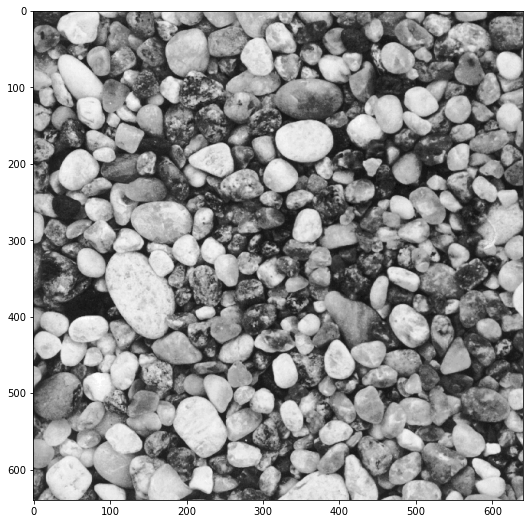

In [4]:
plt.imshow(I)

In [5]:
L = laplace(I)

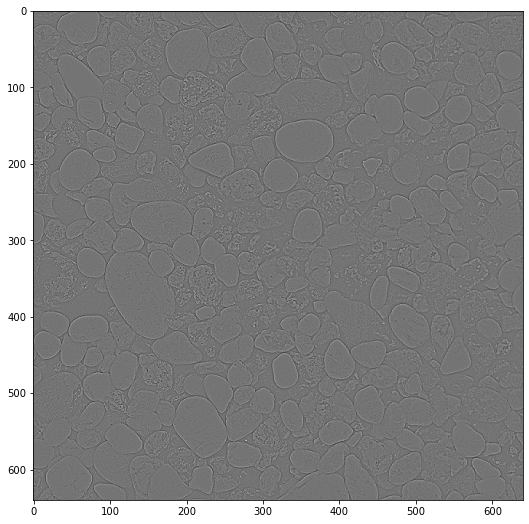

In [6]:
plt.imshow(L)

In [7]:
t = L.max()*0.1

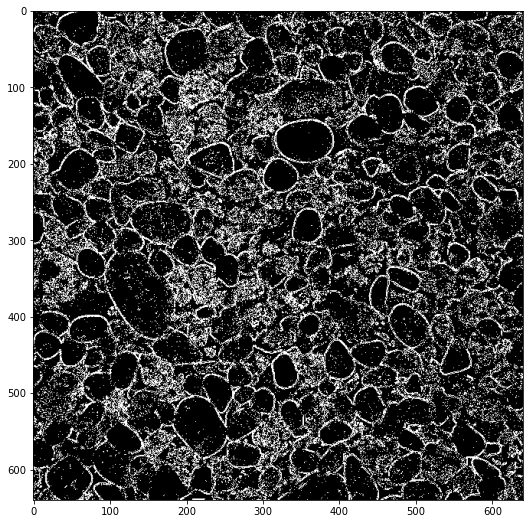

In [8]:
plt.imshow(abs(L)>t)

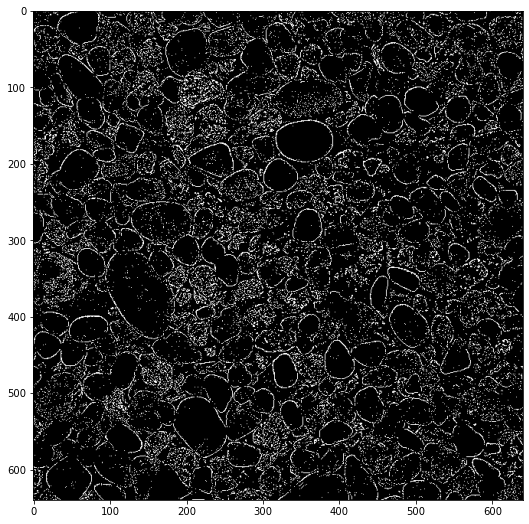

In [9]:
plt.imshow(L>t)

### Marr-Hildreth algorithm

In [10]:
F = gaussian(I,2)
L = laplace(F)

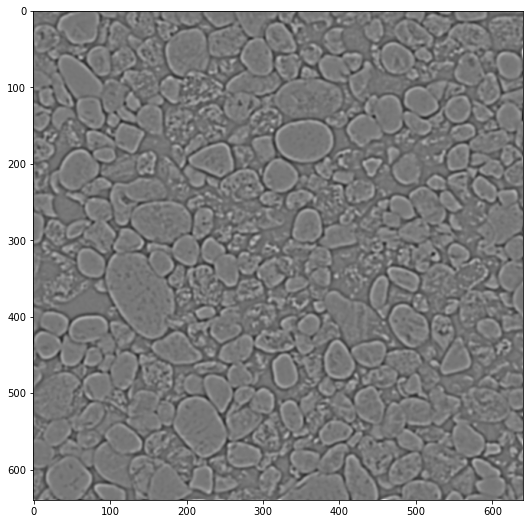

In [11]:
plt.imshow(L)

In [12]:
S = disk(1)
t = L.max()*0.05
P = binary_dilation(L>t,S)
N = binary_dilation(L<-t,S)
MH = np.bitwise_and(P,N)

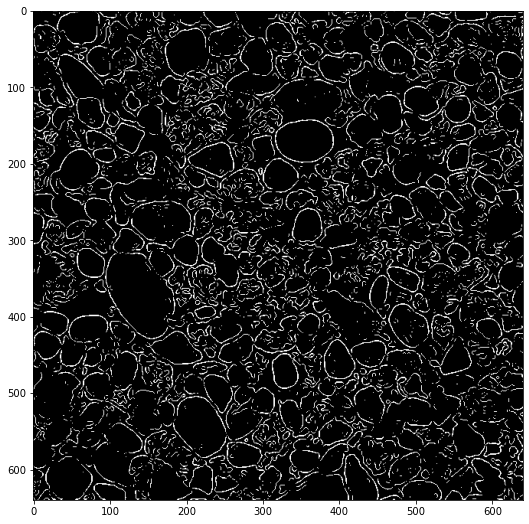

In [13]:
plt.imshow(MH)

### Gradient thresholding

In [14]:
gx = sobel_h(I)
gy = sobel_v(I)

In [15]:
G = np.sqrt(gx**2+gy**2)

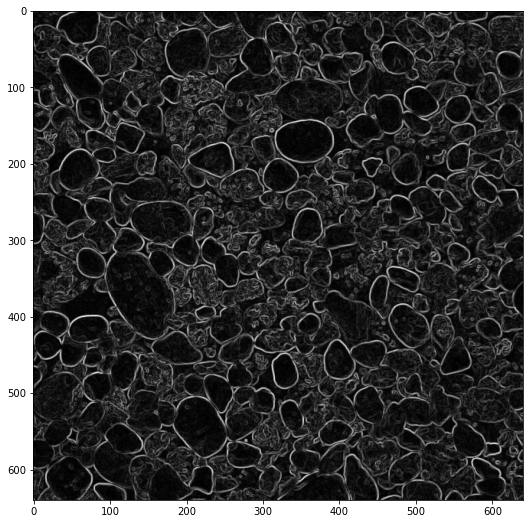

In [16]:
plt.imshow(G)

In [17]:
t = G.max()*0.3

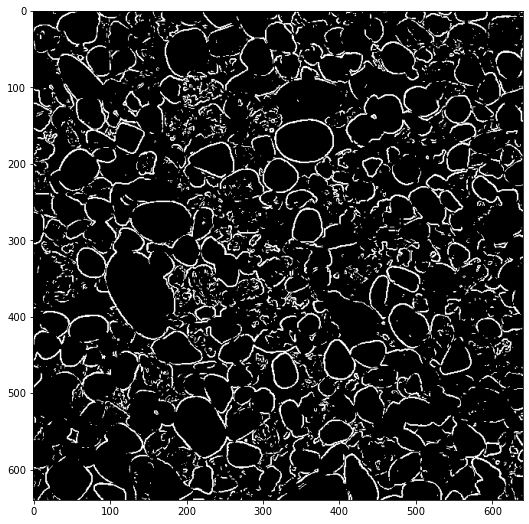

In [18]:
plt.imshow(G>t)

### Canny edge detection

In [19]:
from skimage.feature import canny

In [20]:
C = canny(I,2)

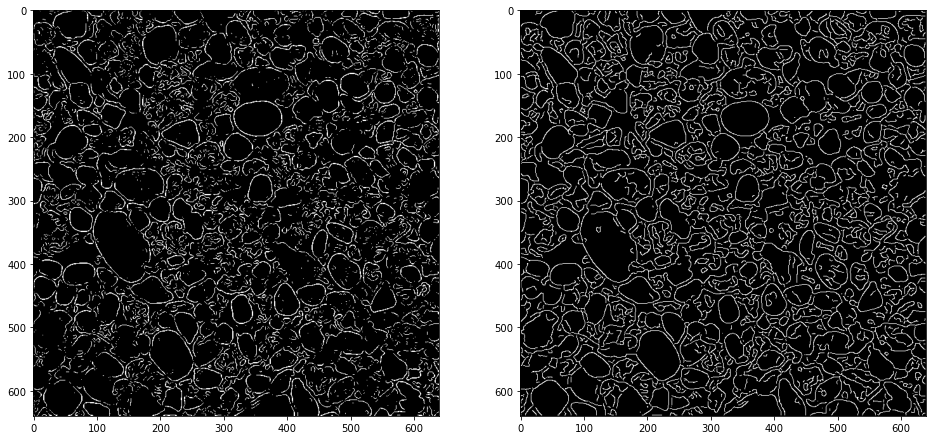

In [21]:
plt.subplot(1,2,1)
plt.imshow(MH)
plt.subplot(1,2,2)
plt.imshow(C)

### Otsu's method

In [22]:
t = threshold_otsu(I)

In [23]:
t

128

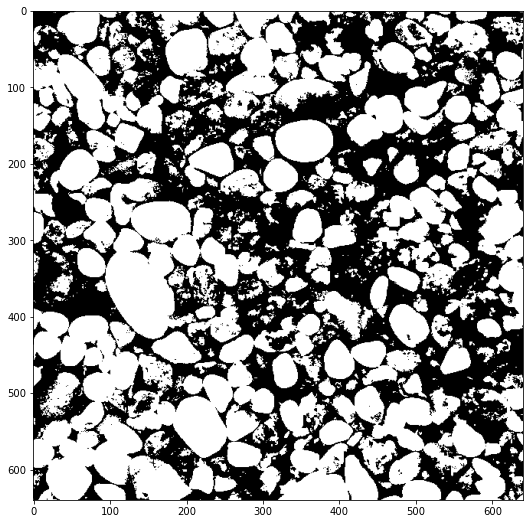

In [24]:
plt.imshow(I>t)

### Local thresholding

In [25]:
T = threshold_local(I,21)

In [26]:
T.shape

(640, 640)

In [27]:
S = I>T

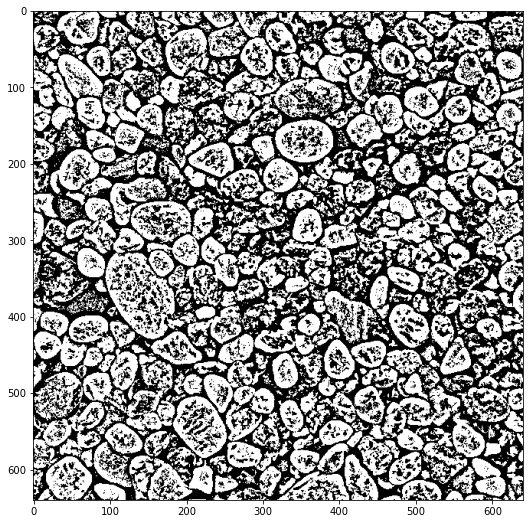

In [28]:
plt.imshow(S)